# Polynomial Regression


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# 1000 sample number between -3 to 3
x = np.linspace(-3,3,1000)
x

array([-3.        , -2.99399399, -2.98798799, -2.98198198, -2.97597598,
       -2.96996997, -2.96396396, -2.95795796, -2.95195195, -2.94594595,
       -2.93993994, -2.93393393, -2.92792793, -2.92192192, -2.91591592,
       -2.90990991, -2.9039039 , -2.8978979 , -2.89189189, -2.88588589,
       -2.87987988, -2.87387387, -2.86786787, -2.86186186, -2.85585586,
       -2.84984985, -2.84384384, -2.83783784, -2.83183183, -2.82582583,
       -2.81981982, -2.81381381, -2.80780781, -2.8018018 , -2.7957958 ,
       -2.78978979, -2.78378378, -2.77777778, -2.77177177, -2.76576577,
       -2.75975976, -2.75375375, -2.74774775, -2.74174174, -2.73573574,
       -2.72972973, -2.72372372, -2.71771772, -2.71171171, -2.70570571,
       -2.6996997 , -2.69369369, -2.68768769, -2.68168168, -2.67567568,
       -2.66966967, -2.66366366, -2.65765766, -2.65165165, -2.64564565,
       -2.63963964, -2.63363363, -2.62762763, -2.62162162, -2.61561562,
       -2.60960961, -2.6036036 , -2.5975976 , -2.59159159, -2.58

Text(0.5, 1.0, 'degree 6')

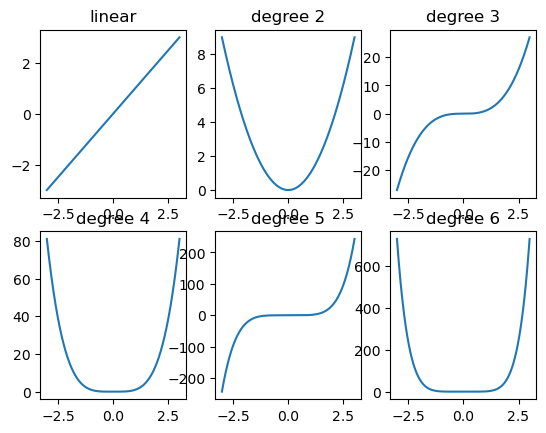

In [11]:
# Plot subplots 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax1.plot(x, x) 
ax1.set_title('linear') 
ax2.plot(x, x**2) 
ax2.set_title('degree 2') 
ax3.plot(x, x**3) 
ax3.set_title('degree 3') 
ax4.plot(x, x**4) 
ax4.set_title('degree 4') 
ax5.plot(x, x**5) 
ax5.set_title('degree 5') 
ax6.plot(x, x**6) 
ax6.set_title('degree 6')



# Polynomial Regression Real World Problem (Example)

In [37]:
df = pd.DataFrame({'Hours_Studied':range(0,26,2),
          'Test_Grade':[20, 21, 22.5, 23.2, 26, 37, 48, 56, 67, 76, 86.9, 89.2, 90.1]},
           index = range(13))
df

,Hours_Studied,Test_Grade
0,0,20.0
1,2,21.0
2,4,22.5
3,6,23.2
4,8,26.0
5,10,37.0
6,12,48.0
7,14,56.0
8,16,67.0
9,18,76.0


In [38]:
#correlation matrix
print('Correlation Matrix: ')
df.corr()

Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.00000,0.97449
Test_Grade,0.97449,1.00000


<AxesSubplot:title={'center':'Grade vs Hours Studied'}, xlabel='Hours_Studied', ylabel='Test_Grade'>

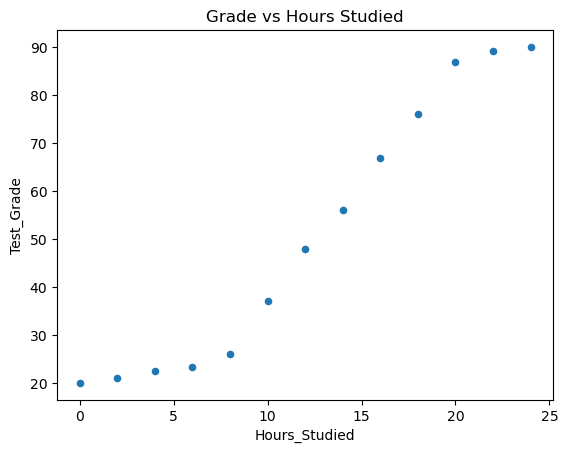

In [39]:
# Simple scatter plot 
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')


In [40]:
# importing linear regression function 
import sklearn.linear_model as lm

# Create linear regression object 
lr = lm.LinearRegression()
lr

LinearRegression()

In [41]:
# independent variable 
x= df.Hours_Studied[:, np.newaxis]

# dependent variable
y= df.Test_Grade                             


C:\Users\JOB\AppData\Local\Temp\ipykernel_5852\1514613939.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= df.Hours_Studied[:, np.newaxis]


In [42]:
# Training the model using the training sets 
lr.fit(x, y)

LinearRegression()

Text(0.5, 0, 'Hours_Studied')

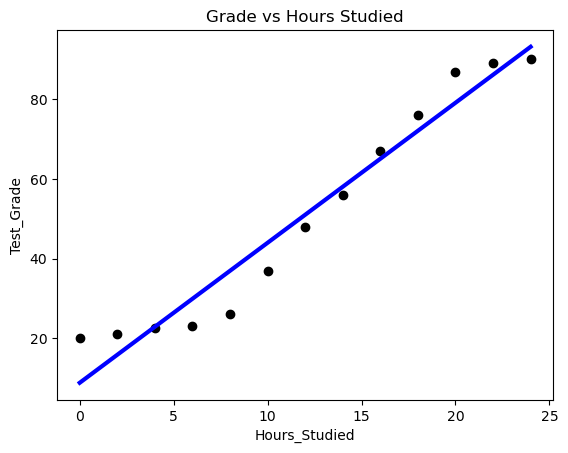

In [43]:
# plotting fitted line 
plt.scatter(x, y,  color='black') 
plt.plot(x, lr.predict(x), color='blue', linewidth=3) 
plt.title('Grade vs Hours Studied') 
plt.ylabel('Test_Grade') 
plt.xlabel('Hours_Studied')


In [44]:
print ("R Squared: ", r2_score(y, lr.predict(x))) 

R Squared:  0.9496315124006409


The correlation analysis shows a 97% positive relationship between hours studied and the test grade, and 95% (r-squared) of variation in test grade can be explained by hours studied. Note that up to 4 hours of average study results in less than a 30 test grade and post 9 hours of study there is not a grade value to add to the grade. This is not a perfect linear relationship, although we can fit a linear line. It is therefore crucial to try higher-order polynomial degrees

# R-Squared for different polynomial degrees


In [45]:
# independent variable 
x= df.Hours_Studied 

# dependent variable
y= df.Test_Grade           


NumPy's vander function will return powers of the input vector for deg in [1, 2, 3, 4, 5]: 

0.9496315124006409
0.9653857149196117
0.9950613322101203
0.9973939347625628
0.9978269397785435


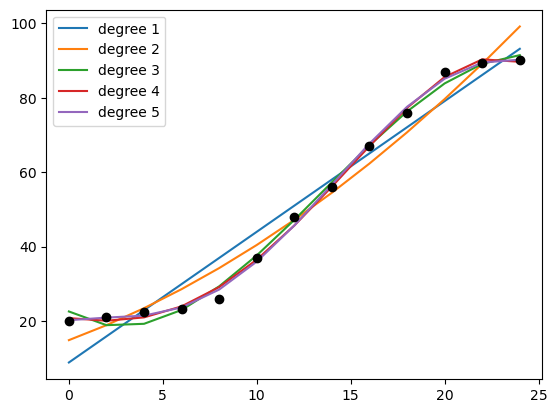

In [47]:
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);    
    y_lr = lr.predict(np.vander(x, deg + 1))    
    plt.plot(x, y_lr, label='degree ' + str(deg));    
    plt.legend(loc=2);    
    print (r2_score(y, y_lr)) 
plt.plot(x, y, 'ok') 

Note degree 1 here is the linear fit, and the higher-order polynomial regression is fitting the curve better and r-square jumps 4% higher at degree 3. Beyond the 3rd degree there is not a massive change in r-squared so we can say that the 3rd degree fits better.

# Special Sikit-learn polynomial feature (Without Looping through the degree list)

In [49]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline


In [50]:
# independent variable 
x= df.Hours_Studied[:, np.newaxis] 

# dependent variable
y= df.Test_Grade                   

C:\Users\JOB\AppData\Local\Temp\ipykernel_5852\1688820761.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= df.Hours_Studied[:, np.newaxis]


R Squared using built-in function:  0.9973939347625628


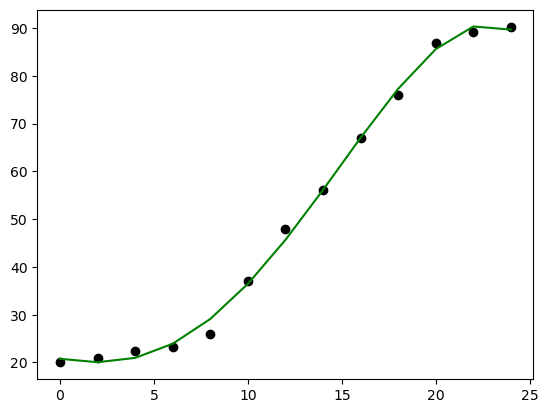

In [55]:
degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
plt.scatter(x, y,  color='black') 
plt.plot(x, model.predict(x), color='green') 
print ("R Squared using built-in function: ", r2_score(y, model.predict(x)))